## Import

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

## Lettura da csv

In [2]:
dataset = pd.read_csv("../Dataset/iris.csv")
dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Preprocessing

### P1. Encoding
In questo caso non serve; viene mostrato il codice del 1-Hot-Encoding.

In [3]:
# dataset = pd.get_dummies(dataset, columns=[])

### P2. Rimpiazzamento dei valori NaN con la media
##### DOMANDE: 
1. Conviene utilizzare un'altra metrica anziché la media?
2. Come comportarsi con i campi che hanno subito l'encoding? (penso convenga allo stesso modo).

In [4]:
dataset = dataset.fillna(dataset.mean())

### P3. Estrazione label, divisione dataset, normalizzazione
##### DOMANDA
1. Bisogna separare il test set oppure è gà a parte?

In [26]:
features = dataset.drop(columns = ['variety'])
labels = dataset['variety']

featuresTrVl, featuresTest, labelsTrVl, labelsTest = train_test_split(features, labels, test_size=0.3, random_state=1)

# normalizzazione
mms = MinMaxScaler()
featuresTrVl_Norm = mms.fit_transform(featuresTrVl)
featuresTest_Norm = mms.fit_transform(featuresTest)
#labels

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [6]:
featuresTrVl

,sepal.length,sepal.width,petal.length,petal.width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [7]:
featuresTrVl_Norm

array([[1.        , 0.25      , 1.        , 0.91666667],
       [0.41176471, 0.75      , 0.11864407, 0.08333333],
       [0.20588235, 0.66666667, 0.06779661, 0.04166667],
       [0.14705882, 0.41666667, 0.06779661, 0.08333333],
       [0.26470588, 0.29166667, 0.49152542, 0.54166667],
       [0.23529412, 0.58333333, 0.08474576, 0.04166667],
       [0.35294118, 0.625     , 0.05084746, 0.04166667],
       [1.        , 0.75      , 0.96610169, 0.875     ],
       [0.76470588, 0.45833333, 0.74576271, 0.83333333],
       [0.88235294, 0.375     , 0.89830508, 0.70833333],
       [0.61764706, 0.33333333, 0.77966102, 0.875     ],
       [0.55882353, 0.33333333, 0.6440678 , 0.70833333],
       [0.5       , 0.58333333, 0.59322034, 0.625     ],
       [1.        , 0.33333333, 0.96610169, 0.79166667],
       [0.41176471, 0.41666667, 0.54237288, 0.45833333],
       [0.14705882, 0.58333333, 0.10169492, 0.04166667],
       [0.41176471, 0.20833333, 0.6779661 , 0.79166667],
       [0.58823529, 0.29166667,

In [8]:
labelsTrVl

118     Virginica
18         Setosa
4          Setosa
45         Setosa
59     Versicolor
          ...    
133     Virginica
137     Virginica
72     Versicolor
140     Virginica
37         Setosa
Name: variety, Length: 105, dtype: object

## KNN e RandomizedSearchCV

In [9]:
#!# leafSizes = np.empty(110) #(per ball_tree e kd_tree), default 30
#!# np.put(leafSizes,  np.arange(110),  np.arange(1, 111)) # da 10 a 110

#p = range(1, 20)
#nn = range(1, 31)
# vedere anche i parametri: metric_params, n_jobs
# metric = 'minkowski' di default 

In [10]:
rs = RandomizedSearchCV(KNeighborsClassifier(metric = 'minkowski', leaf_size = 30), { 
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': range(1, 5)
}, cv=5, return_train_score=True, n_iter=100)

rs.fit(featuresTrVl_Norm, labelsTrVl)
results = rs.cv_results_

C:\Users\Domenico\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
resDf = pd.DataFrame(rs.cv_results_)[['param_n_neighbors', 'param_weights','param_algorithm', 'mean_train_score', 'mean_test_score']]
resDf

,param_n_neighbors,param_weights,param_algorithm,mean_train_score,mean_test_score
0,20,distance,ball_tree,1.000000,0.952381
1,30,distance,ball_tree,1.000000,0.942857
2,7,uniform,brute,0.976156,0.952381
3,20,distance,brute,1.000000,0.952381
4,21,uniform,ball_tree,0.947492,0.923810
...,...,...,...,...,...
95,26,distance,kd_tree,1.000000,0.952381
96,28,uniform,ball_tree,0.945082,0.923810
97,5,uniform,kd_tree,0.961780,0.942857
98,24,uniform,brute,0.947435,0.933333


In [24]:
#redResDf = resDf[['param_n_neighbors', 'mean_test_score', 'mean_train_score']].sort_values('mean_test_score').tail(25)
redResDf = resDf[['param_n_neighbors', 'mean_test_score', 'mean_train_score']].sort_values('param_n_neighbors')
redResDf
#ordine decrescente (parametro) + head(n)

,param_n_neighbors,mean_test_score,mean_train_score
69,1,0.952381,1.000000
79,1,0.942857,1.000000
89,1,0.952381,1.000000
47,2,0.942857,0.971336
48,2,0.942857,1.000000
...,...,...,...
74,29,0.914286,0.933232
26,29,0.961905,1.000000
22,29,0.933333,0.940347
1,30,0.942857,1.000000


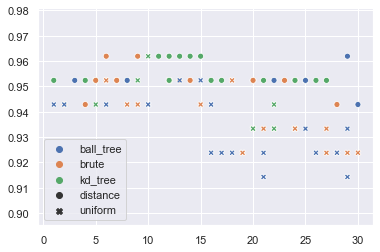

In [13]:
sns.scatterplot(data=results, x="param_n_neighbors", y="mean_test_score", style="param_weights", hue="param_algorithm")

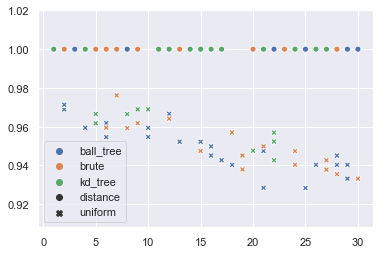

In [14]:
sns.scatterplot(data=results, x="param_n_neighbors", y="mean_train_score", style="param_weights", hue="param_algorithm")

In [25]:
redResDf.groupby('param_n_neighbors').mean()

,mean_test_score,mean_train_score
param_n_neighbors,,
1,0.949206,1.000000
2,0.942857,0.976587
3,0.952381,1.000000
4,0.949206,0.986485
5,0.950000,0.982081
6,0.952381,0.975204
7,0.952381,0.988078
8,0.950476,0.985160
9,0.952381,0.976921


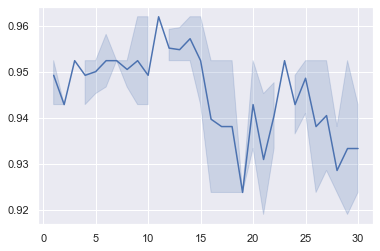

In [16]:
sns.lineplot(data=results, x="param_n_neighbors", y="mean_test_score")

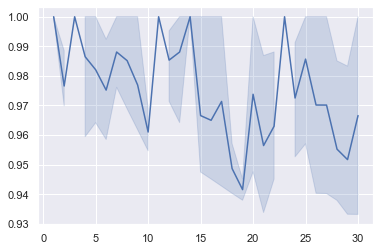

In [17]:
sns.lineplot(data=results, x="param_n_neighbors", y="mean_train_score")